![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<a href="https://hub.callysto.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fcallysto%2Fcurriculum-notebooks&branch=master&subPath=TechnologyStudies/ComputingScience/Courses/files-&-file-structures-1.ipynb&depth=1"><img src="https://raw.githubusercontent.com/callysto/curriculum-notebooks/master/open-in-callysto-button.svg?sanitize=true" width="123" height="24" alt="Open in Callysto"/></a>

# CSE2130: Files and File Structures 1

*[Alberta Education Learning Outcomes-Business, Administration, Finance & Information Technology (BIT)](https://education.alberta.ca/media/159479/cse_pos.pdf)*

*Computer Science-Page 27*

*Prerequisite: [CSE2120: Data Structures 1](data-structures-1.ipynb)*

***


Students learn how to design, code and debug programs that use data files to store and retrieve data on secondary storage devices. Building on their knowledge of derived data structures, they learn how to use those structures to organize data for efficient file handling. As part of this process, they learn what types of problems benefit from the use of external files.

## Theory Questions

1. Identify what each of the following file types is for, and whether it is text or binary format.
    1. .txt
    2. .gif
    3. .png
    4. .csv
    5. .doc
    6. .ipynb
    7. .jpg
    8. .key
    9. .mp3
    10. .mov
    11. .svg
    12. .stl

5. describe and represent the relative advantages of text versus binary files including:
    * access speed
    * storage space requirement
    * difficulty to implement
    * maintainability

2. When accessing online files, what are the differences amoung sequential, random, and indexed methods?

3. Explain and represent the client/server relationship that exists between a file using application and the operating system with consideration to:
    * how programming environments access secondary storage devices
    * how operating systems handle the actual process of manipulating data in secondary memory
    * how programming environments request file handling services from the operating system
    * the use of a file buffer, data stream and file descriptor table

4. Describe the main operations associated with text files including:
    * creating a file buffer or stream
    * opening an existing file
    * creating a new file
    * exporting data to a file
    * importing data from a file
    * appending data to a file
    * closing a file
    * comparing two files
    * copying a file
    * merging two files

2. identify possible life roles related to the skills and content of this cluster
    * recognize and then analyze the opportunities and barriers in the immediate environment
    * identify potential resources to minimize barriers and maximize opportunities

## Project 1 - Text Classification

We are going to use [MediaPipe](https://developers.google.com/mediapipe) to classify text according to positivity and negativity.

In [1]:
!pip install -q mediapipe==0.10.20
!wget -O classifier.tflite -q https://storage.googleapis.com/mediapipe-models/text_classifier/bert_classifier/float32/1/bert_classifier.tflite

from mediapipe.tasks import python
from mediapipe.tasks.python import text
options = text.TextClassifierOptions(base_options = python.BaseOptions(model_asset_path='classifier.tflite'))
classifier = text.TextClassifier.create_from_options(options)
print('Classifier created')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 9.5 MB/s eta 0:00:00
Classifier created


Now that the MediaPipe text classifier is set up, we can classify a block of text.

In [2]:
text = '''
Shall I compare thee to a summer's day?
Thou art more lovely and more temperate:
Rough winds do shake the darling buds of May,
And summer's lease hath all too short a date;
Sometime too hot the eye of heaven shines,
And often is his gold complexion dimm'd;
And every fair from fair sometime declines,
By chance or nature's changing course untrimm'd;
But thy eternal summer shall not fade,
Nor lose possession of that fair thou ow'st;
Nor shall death brag thou wander'st in his shade,
When in eternal lines to time thou grow'st:
So long as men can breathe or eyes can see,
So long lives this, and this gives life to thee.
'''

result = classifier.classify(text)
display(result.classifications[0].categories)

[Category(index=1, score=0.870464026927948, display_name='', category_name='positive'),
 Category(index=0, score=0.12953591346740723, display_name='', category_name='negative')]

The text classifier obtained using **MediaPipe** is designed to classify text into predefined categories. In this case, these categories are "positive" and "negative".

As you can see, the classifier gives the approximate score of 0.865 and 0.135 to the categories *positive* and *negative* respectively. This suggests that the classifier has a higher confidence that the text is classified as positive, rather than negative.

Now that we've seen how it can classify text, let's try a whole novel downloaded as a text file from [Project Gutenberg](https://www.gutenberg.org).

In [3]:
book_url = 'https://www.gutenberg.org/cache/epub/64317/pg64317.txt'
import requests
r = requests.get(book_url) # get the text from the url
r.encoding = 'utf-8' # specify the type of text encoding in the file
title = r.text.split('\n')[0]
text = r.text.split('***')[2] # get the part after the header
print(title)

result = classifier.classify(text)
display(result.classifications[0].categories)

﻿The Project Gutenberg eBook of The Great Gatsby


[Category(index=1, score=0.6636134386062622, display_name='', category_name='positive'),
 Category(index=0, score=0.3363865613937378, display_name='', category_name='negative')]

To make it a little easier to use, let's create a function that returns a dictionary result.

In [4]:
def classify_text(text):
    result = classifier.classify(text)
    rd = {}
    rd[result.classifications[0].categories[0].category_name] = result.classifications[0].categories[0].score
    rd[result.classifications[0].categories[1].category_name] = result.classifications[0].categories[1].score
    return rd

classify_text(text)

{'positive': 0.6636134386062622, 'negative': 0.3363865613937378}

Next find another book from [Project Gutenberg](https://www.gutenberg.org), copy the link to the `Plain Text UTF-8` file and paste that link into the `book_url = ` variable in the code cell below.

In [5]:
book_url = 'https://www.gutenberg.org/cache/epub/37106/pg37106.txt'
try:
    r = requests.get(book_url)
    r.encoding = 'utf-8'
    title = r.text.split('\n')[0]
    text = r.text.split('***')[2]
    print(title)

    result = classifier.classify(text)
    display(result.classifications[0].categories)
except:
    print("Invalid Book Url, please try again")

﻿The Project Gutenberg eBook of Little Women; Or, Meg, Jo, Beth, and Amy


[Category(index=0, score=0.678820013999939, display_name='', category_name='negative'),
 Category(index=1, score=0.32117998600006104, display_name='', category_name='positive')]

1. How does your chosen book compare to "The Great Gatsby" in terms of positivity and negativity?

Little Women is a story about four sisters and family, and navigating through the period between childhood and womanhood.
The Great Gatsby, on the other hand, is a tradgedy. It is the story of a wealthy man and his love for a wealthy young woman.

I would definetely say that Little Women is more positive than the Great Gatsby. The Great Gatsby centers around a deeper theme involving the illusion of the American dream, and the relentless pursuit of an unattainable goal - which to me, at least, is more or less tragic.
In Little Women problems do occur but they have their family to support them.

In the Great Gatsby ends in the protagonist being abandoned by the one he loves most and shot.
Therefore, I strongly believe that Little Women is a more positive book, while the Great Gatsby is the latter.

1. My chosen book,
 Is a story that I've read in the past. I actually own the novel.

 The main message of this book is a woman's struggle between familial duality and personal growth.

### Sentiment Analysis Data Science

Using the following code cell as an *example*, divide **your chosen book** into chapters and create a visualization of the positivity and negativity by chapter.

Remember that you need to paste in the link to the `Plain Text UTF-8` file.

In [6]:
book_url = 'https://www.gutenberg.org/cache/epub/37106/pg37106.txt'
r = requests.get(book_url)
r.encoding = 'utf-8'
title = r.text.split('\n')[0]
text = r.text.split('***')[2]

import pandas as pd
ch = [] # create an empty list that we will append to
for chapter in text.split('\r\n\r\n\r\n'):
    chapter = chapter.replace('\r','').replace('\n',' ').replace('\t','') # remove the newline characters
    #chapter = chapter.replace('  ',' ').replace('  ',' ').strip() # remove extra spaces
    #chapter = chapter.replace('--','') # remove extra dashes
    ch.append(chapter) # append the chapter text to the list
book = pd.DataFrame(ch, columns=['Text']) # create a dataframe from the list
book = book[book['Text'].apply(lambda x: len(x)>250)] # drop any rows where the text column is shorter than 250 characters
book[['Positive', 'Negative']] = pd.DataFrame(book['Text'].apply(classify_text).tolist(), index=book.index) # apply the classify_text function to each row

import plotly.express as px
fig = px.bar(book, x=book.index, y=['Positive', 'Negative'], title=title).update_layout(xaxis_title='Chapter', yaxis_title='Score')
fig.add_hline(y=book['Positive'].mean(), line_color='blue')
fig.add_hline(y=book['Negative'].mean(), line_color='red')
fig.show()

Write a paragraph about how sentiment analysis could be used in other classes or jobs.

Jobs:
- Marketing and Advertising
- Customer Service
- Data Science
- Psychology and Mental Health
- Journalism and Media
- Human Resources
- Political Science and Policy Making
- Education
- E-commerce and retail
- Content Moderation

Classes:
- Computer Science (of course).
- English Language Arts (you could maybe study how language conveys emotion)
- Social Studies (maybe you could study the public opinion of certain events in history)
- Business Studies
- Psychology
- Mathematics and statistics
- Media Studies
- Economics
- Biology (with Healthcare Applications, you could study how sentiment analysis can be used to get patient feedback)

Sentiment analysis...

Is the process of analysing digital text to determine whether the emotional tone of something is percieved as positive, negative or neutral.

## Project 2 - Image Classification

Next we will train an AI system to recognize if an image contains a cat or a dog.

### Training Data

We will use images that are [public domain](https://en.wikipedia.org/wiki/Public_domain) or [Creative Commons](https://creativecommons.org/) because we are allowed to use them without purchasing a license.

The more examples you have, the better the AI will be able to discriminate between cats and dogs.

1. Create two folders on your computer, one called `cats` and one called `dogs`.
1. Find and download at least 10 images of cats from [Pexels](https://www.pexels.com/search/cat/) or [Pixabay](https://pixabay.com/images/search/cat/). Put them in your `cats` folder.
1. Find and download at least 10 images of dogs from [Pexels](https://www.pexels.com/search/dog/) or [Pixabay](https://pixabay.com/images/search/dog/). Put them in your `dogs` folder.

### Teaching the Machine

1. Open [Teachable Machine image training](https://teachablemachine.withgoogle.com/train/image)
1. Rename `Class 1` as `cat`, and `Class 2` as `dog` by clicking on the pencil icons.
1. Upload your cat images to the `cat` class and your dog images to the `dog` class.
1. Click the `Train model` button.
1. After the training has finished, click the `Export Model` button, click the `Tensorflow Lite` tab on the right, then click the `Download my model` button. The button will change to `Converting model...` and it will take a few minutes, don't click away from that browser tab.
1. Your model should then download automatically as `converted_tflite.zip`.
1. Upload your `converted_tflite.zip` file to [the folder that this notebook is in](.) on Callysto Hub or wherever you are running this notebook.
    * You can open the folder that this notebook is in by clicking on the logo at the top left of the page and then click on the `data-science-and-artificial-intelligence` folder.
    * If you're running in Jupyter Lab the file browser is already on the left.

After you have completed all of those steps, run the following cell to set up the image classifier.

In [13]:
!pip install tflite-runtime --user

In [18]:
!pip uninstall tflite-runtime -y
!pip install tflite-runtime --user


Found existing installation: tflite-runtime 2.14.0
Uninstalling tflite-runtime-2.14.0:
  Successfully uninstalled tflite-runtime-2.14.0
  Using cached tflite_runtime-2.14.0-cp310-cp310-manylinux2014_x86_64.whl.metadata (1.4 kB)
Using cached tflite_runtime-2.14.0-cp310-cp310-manylinux2014_x86_64.whl (2.4 MB)


In [21]:
try:
    import tflite_runtime.interpreter as tflite
except ModuleNotFoundError:
    import sys
    sys.path.append('/root/.local/lib/python3.10/site-packages')
    try:
        import tflite_runtime.interpreter as tflite
    except ModuleNotFoundError:
        !pip install tflite-runtime --user
        import tflite_runtime.interpreter as tflite

from zipfile import ZipFile
from PIL import Image, ImageOps
import numpy as np
import requests, urllib.request, os
import pandas as pd
from IPython.display import clear_output, display
clear_output()

try:
    with ZipFile('converted_tflite.zip', 'r') as zip_object:
        zip_object.extractall()
except:
    print('Unable to find your converted_tflite.zip file, using online version')
    r = requests.get('https://raw.githubusercontent.com/callysto/data-files/main/data-science-and-artificial-intelligence/converted_tflite.zip')
    with open('converted_tflite.zip', 'wb') as f:
        f.write(r.content)
    with ZipFile('converted_tflite.zip', 'r') as zip_object:
        zip_object.extractall()

interpreter = tflite.Interpreter('model_unquant.tflite')
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape']

class_names = open('labels.txt', 'r').readlines()

os.remove('model_unquant.tflite')
os.remove('labels.txt')

def classify_image(image_url, show_image=False):
    filename = image_url.split('/')[-1]
    r = requests.get(image_url, stream=True)
    with open(filename, 'wb') as f:
        f.write(r.content)
    image = Image.open(filename).convert('RGB')
    image = image.resize((input_shape[1], input_shape[2]))
    if show_image:
        display(image)
    os.remove(filename)
    input_data = (np.expand_dims(np.array(image), axis=0) / 255.0).astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    predicted_class = np.argmax(output_data)
    predicted_class_name = class_names[predicted_class].strip()[2:]
    confidence_level = output_data[0][predicted_class]
    return predicted_class_name, confidence_level, image

clear_output()
print('Model imported and classify_image(image_url) function defined')


Model imported and classify_image(image_url) function defined


The function will return a classification and confidence level, and a resized version of the image.

Now that we have set up the `classify_image()` function, we can load an image from a link and get its classification according to our trained AI.

Change the string in the `image_url` variable to be a direct link to an online image. *Make sure you have copied the `image address` and that it is not a link to a webpage. The url should end with something like `.jpg`, `.gif`, or `.png`*

In [22]:
image_url = 'https://i.kinja-img.com/gawker-media/image/upload/c_fit,f_auto,g_center,q_60,w_965/arznjdijwqntcpbuwt5v.jpg'

results = classify_image(image_url)
results

('dog', 0.83429253, <PIL.Image.Image image mode=RGB size=224x224>)

The first value returned is the classification, in our case `cat` or `dog`.

The second is "confidence score" which is how sure the AI is of that classification, `1` means `100%` confident.

The third value is the downloaded and resized image.

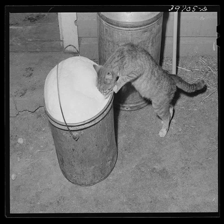

In [23]:
results[2]

Try this with some other image links to see how accurate it is. To increase the accuracy, retrain the model with more images.

In [24]:
image_url = 'https://plus.unsplash.com/premium_photo-1673967831980-1d377baaded2?fm=jpg&q=60&w=3000&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y2F0c3xlbnwwfHwwfHx8MA%3D%3D'

results = classify_image(image_url)
results

('cat', 0.999833, <PIL.Image.Image image mode=RGB size=224x224>)

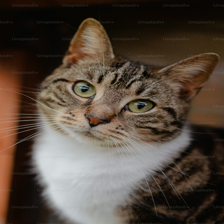

In [25]:
results[2]

In [26]:
image_url = 'https://images.pexels.com/photos/11355104/pexels-photo-11355104.jpeg?auto=compress&cs=tinysrgb&w=600'

results = classify_image(image_url)
results

('cat', 0.99606305, <PIL.Image.Image image mode=RGB size=224x224>)

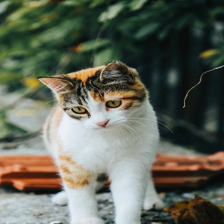

In [27]:
results[2]

Of course we can also use this same process to train an AI model to categorize images of other things, for example identifying if something is a soup, salad, or sandwich.

Answer the following questions.

What file types were involved in training and deploying your AI model?
- .jpeg
- .zip
- .ipynb
- .tflite

Write a paragraph about some potential real-world applications of image classification.

Healthcare is one example where Image classification can be applied. I think it can be used in healthcare, when an x-ray, or MRI (for example) is taken. Image classification can help doctors identify if theres tumors or something abnormal going on with a patient. Image classification can also be applied in Retail or e-commerece. It can be used to put different kinds of products into categories. People are often on their phones or personal devices. Social media is also extremely prevalent nowadays. Image classification may also be used to keep social media safer and appropriate for its users. It can identify harmful content, and there can be steps developers can take to ensure any "flagged" content can be removed from the site automatically.
Image classification can make jobs and different tasks more efficient than otherwise done manually.

---

# Outcomes:

The student will:

1. analyze and represent the nature, structure and utility of external data files
    1. identify and illustrate the general characteristics of external data files including:
        1. access methods; e.g., sequential, random, indexed
        2. type of data; e.g., text (encoded in a format such as ASCII code), binary (encoded in binary code)
        3. text files; e.g., data organization, access methods
    2. explain and represent the client/server relationship that exists between a file using application and the operating system with consideration to:
        1. how programming environments access secondary storage devices
        2. how operating systems handle the actual process of manipulating data in secondary memory
        3. how programming environments request file handling services from the operating system
        4. the use of a file buffer, data stream and file descriptor table
    3. describe and represent the logical structure of text files including:
        1. sequential text
        2. random-access text files
        3. Indexed Sequential Access Method (ISAM) text files
    4. describe the main operations associated with text files including:
        1. creating a file buffer or stream
        2. opening an existing file
        3. creating a new file
        4. exporting data to a file
        5. importing data from a file
        6. appending data to a file
        7. closing a file
        8. comparing two files
        9. copying a file
        0. merging two files
    5. describe and represent the relative advantages of each file type including:
        1. access speed
        2. storage space requirement
        3. difficulty to implement
        4. maintainability
<br><br>
2. create and/or modify algorithms that make effective use of external data files
    1. use appropriate general design techniques for a specific programming environment
    2. analyze and decompose the problem into appropriate subsections using techniques appropriate for the chosen design approach
    3. evaluate subsections and identify any that may require some type of external file capability, based on the nature and amount of the data to be processed and type of processing operations
    4. identify and use or construct the appropriate external file structure based on:
        1. storage space required
        2. the number and speed of required operations
        3. programmer efficiency
    5. create sequential and random-access files, as required
    6. identify and sequence the operations needed to process the data prior to export and/or process the data after import
    7. test and modify the algorithm using appropriate “fail-on-paper” techniques
<br><br>
3. create and/or modify programs based on appropriate algorithms that make effective use of external data files
    1. convert algorithms calling for the use of external data files into programs that reflect the algorithm’s design
    2. use cohesive subprograms with helper subprograms, if required, to hide and/or protect data, and separate the implementation of the file handling code and attendant data structure and operations from its calling modules
    3. use original (user-created) or built-in, environment supported file handling code segments and their attendant operations appropriate to the data being manipulated
<br><br>
4. compare program operation and outcomes with the intent of the algorithm and modify, as required
    1. use appropriate error-trapping mechanisms built into the programming environment, as well as programmer-directed error-trapping techniques, to eliminate logic errors and debug the program
    2. compare the congruency between the outcomes of the debugged program and the original intent of the algorithm and modify both, as required
<br><br>
5. demonstrate basic competencies
    1. demonstrate fundamental skills to:
        1. communicate
        2. manage information
        3. use numbers
        4. think and solve problems
    2. demonstrate personal management skills to:
        1. demonstrate positive attitudes and behaviours
        2. be responsible
        3. be adaptable
        4. learn continuously
        5. work safely
    3. demonstrate teamwork skills to:
        1. work with others
        2. participate in projects and tasks
<br><br>
6. identify possible life roles related to the skills and content of this cluster
    1. recognize and then analyze the opportunities and barriers in the immediate environment
    2. identify potential resources to minimize barriers and maximize opportunities